In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import warnings
warnings.filterwarnings('ignore')

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

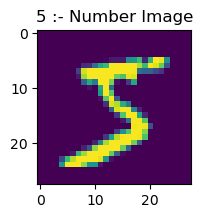

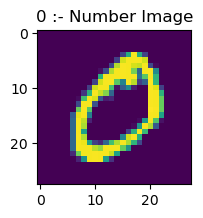

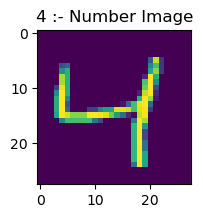

In [3]:
def show_image(x,y):
    plt.figure(figsize=(5,2))
    plt.imshow(x)
    plt.title(f'{y} :- Number Image')
    plt.show()

show_image(x_train[0],y_train[0])
show_image(x_train[1],y_train[1])
show_image(x_train[2],y_train[2])

In [4]:
x_train[0].max(),x_train[0].min()

(255, 0)

In [5]:
x_train,x_test=x_train/255,x_test/255

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0].max(),x_train[0].min()

(1.0, 0.0)

In [8]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
x_train[0].shape

(28, 28, 1)

In [11]:
y_train[0]

5

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,       # Random rotation within 10 degrees
    width_shift_range=0.1,   # Random horizontal shift by 10%
    height_shift_range=0.1,  # Random vertical shift by 10%
    zoom_range=0.1,          # Random zoom by up to 10%
    shear_range=0.1          # Shear transformation by 10%
)

# Fit the generator to the training data (this step calculates statistics for normalization)
datagen.fit(x_train)

In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(datagen.flow(x_train, y_train, batch_size=64) ,epochs=5,validation_data=(x_test, y_test))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.7726 - loss: 0.7104 - val_accuracy: 0.9854 - val_loss: 0.0494
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9637 - loss: 0.1161 - val_accuracy: 0.9899 - val_loss: 0.0334
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9741 - loss: 0.0834 - val_accuracy: 0.9917 - val_loss: 0.0263
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 68ms/step - accuracy: 0.9796 - loss: 0.0669 - val_accuracy: 0.9917 - val_loss: 0.0273
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 74ms/step - accuracy: 0.9819 - loss: 0.0578 - val_accuracy: 0.9915 - val_loss: 0.0284


In [17]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9892 - loss: 0.0338


[0.02836356870830059, 0.9915000200271606]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


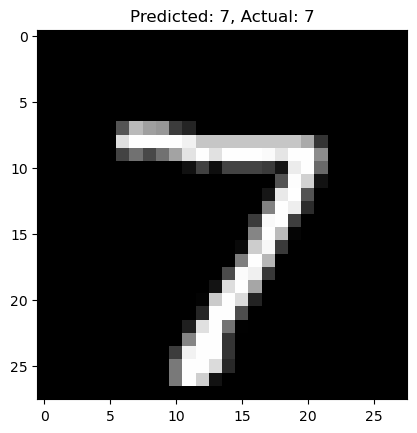

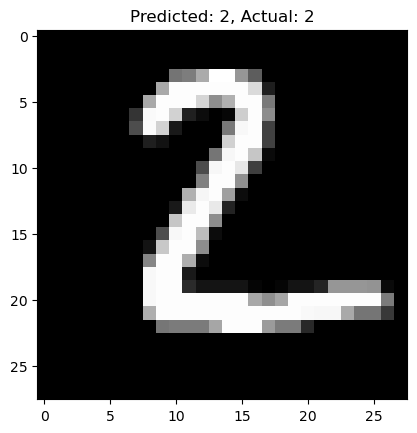

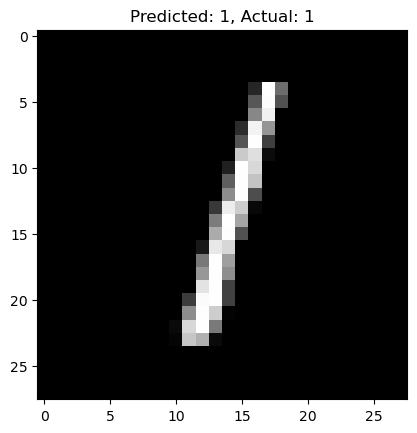

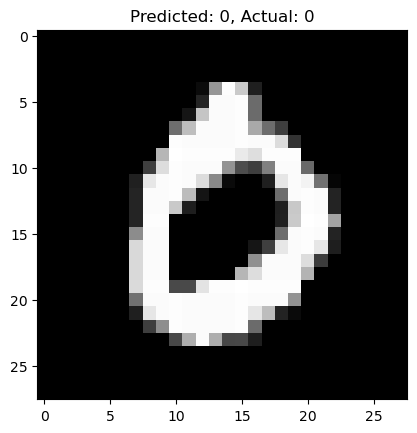

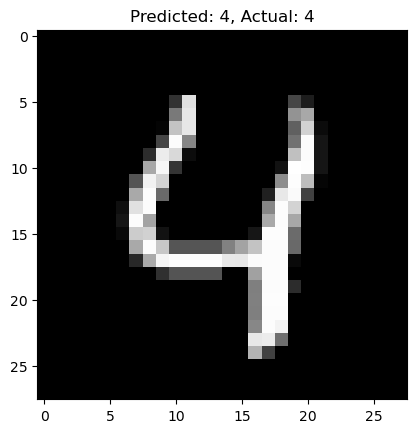

In [18]:
predictions = model.predict(x_test)

# Display the first 5 test images and their predicted labels
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()}, Actual: {y_test[i]}")
    plt.show()

In [19]:
predictions[0]

array([1.3946128e-09, 2.7739166e-08, 3.0105801e-07, 7.6990545e-07,
       1.4363214e-09, 9.2278535e-10, 8.4466489e-13, 9.9999869e-01,
       5.5875418e-08, 1.6241312e-07], dtype=float32)

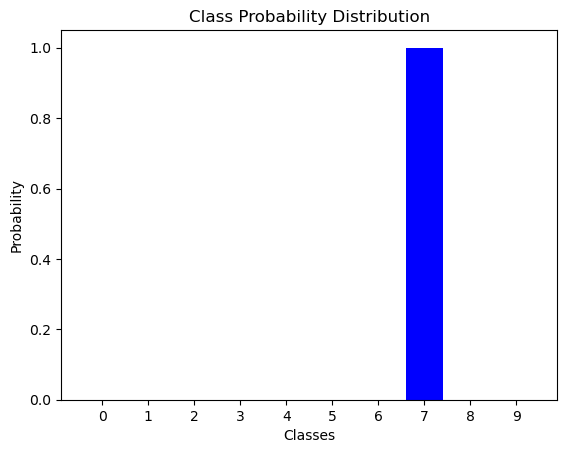

In [20]:
probabilities = np.array([9.1423786e-08, 2.3691384e-06, 4.5669887e-07, 3.6621341e-07,
                          5.4388242e-06, 6.7083569e-08, 3.0838160e-10, 9.9997485e-01,
                          1.8952891e-08, 1.6356147e-05], dtype=np.float32)

# Create an array for the class labels (0 to 9)
classes = np.arange(10)

# Plotting the bar chart
plt.bar(classes, probabilities, color='blue')
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.title('Class Probability Distribution')
plt.xticks(classes)  # To label the x-axis with class numbers
plt.show()

In [21]:
def predict_image(model, img_path):
    try:
        # Load the image in grayscale mode and default display image
        img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
        img_display = image.load_img(img_path, target_size=(28, 28))
        
        # Convert the image to a numpy array
        img_array = image.img_to_array(img)
        
        # Normalize the image
        img_array = img_array / 255.0
        
        # Reshape the image to match the model input (batch size, height, width, channels)
        img_array = np.expand_dims(img_array, axis=0)
        
        # Make prediction
        prediction = model.predict(img_array)
        
        # Get the class label by finding the index of the highest probability
        predicted_class = prediction.argmax()
        
        # Print the result
        print(f"Predicted class: {predicted_class}")
        
        # Plot the images
        plt.imshow(img_display)
        plt.title("Default Image")
        plt.show()
        
        plt.imshow(img, cmap='gray')
        plt.title("Grayscale Image")
        plt.show()
        
        return predicted_class

    except FileNotFoundError:
        print(f"Error: The file '{img_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [22]:
model.save('mnist_classification_deep_learning_model.h5')